<a href="https://colab.research.google.com/github/ProGenei/GhadeerNoohT5/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from collections import Counter
import re
from tensorflow.keras.layers import Embedding, Bidirectional ,SimpleRNN, Dense,Dropout, Lambda

# Download the Dataset

In [ ]:
!kaggle datasets download -d khaledzsa/spam-messages
!unzip spam-messages.zip

In [59]:
df = pd.read_csv('spam.csv')

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [ ]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
pd.set_option('display.max_colwidth', 1000)

In [ ]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's https://link2.com,spam
3,U dun say so early hor... U c already then say... https://link2.com,ham
4,"Nah I don't think he goes to usf, he lives around here though https://link1.com",ham


In [ ]:
df.sample(10)

,text,label
3792,Hey are you angry with me. Reply me dr. https://link2.com,ham
3527,"You are a å£1000 winner or Guaranteed Caller Prize, this is our Final attempt to contact you! To Claim Call 09071517866 Now! 150ppmPOBox10183BhamB64XE https://link2.com",spam
1702,I have lost 10 kilos as of today! https://link1.com,ham
4224,"\The world suffers a lot... Not because of the violence of bad people. But because of the silence of good people!\""",ham
5334,"Garbage bags, eggs, jam, bread, hannaford wheat chex",ham
4368,Anytime lor... https://link1.com,ham
1059,EASTENDERS TV Quiz. What FLOWER does DOT compare herself to? D= VIOLET E= TULIP F= LILY txt D E or F to 84025 NOW 4 chance 2 WIN å£100 Cash WKENT/150P16+,spam
2943,We currently have a message awaiting your collection. To collect your message just call 08718723815.,spam
4917,Sitting in mu waiting for everyone to get out of my suite so I can take a shower,ham
4218,Anything lor if they all go then i go lor...,ham


In [ ]:
df.sample(10)

,text,label
1127,"Height of \Oh shit....!!\"" situation: A guy throws a luv letter on a gal but falls on her brothers head whos a gay https://link1.com",ham
5288,An excellent thought by a misundrstud frnd: I knw u hate me bt the day wen u'll knw the truth u'll hate urself:-( Gn:-),ham
419,Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p https://link1.com,spam
2214,Ok then i'll let him noe later n ask him call u tmr... https://link1.com,ham
1146,Babe ? I lost you ... :-(,ham
2878,U still painting ur wall?,ham
5291,Xy trying smth now. U eat already? We havent...,ham
3081,"And very importantly, all we discuss is between u and i only.",ham
4119,"Babe! How goes that day ? What are you up to ? I miss you already, my Love ... * loving kiss* ... I hope everything goes well.",ham
4005,IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCARY MOVIE YEST ITS QUITE FUNNY! WANT 2MRW AFTERNOON? AT TOWN OR MALL OR SUMTHIN?xx https://link3.com,ham


In [60]:
df_copy = df.copy()

In [ ]:
df_copy.sample(50)

,text,label
2334,Do you like Italian food? https://link3.com,ham
486,"FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com https://link2.com",spam
4044,If You mean the website. Yes.,ham
2686,There r many model..sony ericson also der.. &lt;#&gt; ..it luks good bt i forgot modl no https://link2.com,ham
2960,I'm doing da intro covers energy trends n pros n cons... Brief description of nuclear fusion n oso brief history of iter n jet got abt 7 n half pages.. https://link3.com,ham
1452,"That's good, because I need drugs https://link1.com",ham
908,WHITE FUDGE OREOS ARE IN STORES https://link3.com,ham
2713,Nope i'm not drivin... I neva develop da photos lei... https://link1.com,ham
1884,I love your ass! Do you enjoy doggy style? :) https://link2.com,ham
4003,Well there's a pattern emerging of my friends telling me to drive up and come smoke with them and then telling me that I'm a weed fiend/make them smoke too much/impede their doing other things so you see how I'm hesitant,ham


In [ ]:
df.shape

(5572, 2)

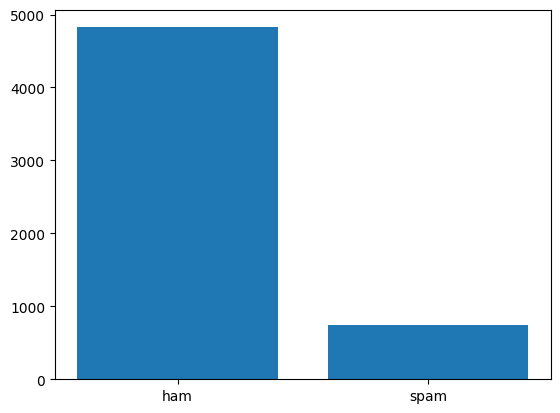

In [ ]:
plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's https://link2.com
3,U dun say so early hor... U c already then say... https://link2.com
4,"Nah I don't think he goes to usf, he lives around here though https://link1.com"
...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate. https://link3.com"
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other suggestions? https://link1.com"
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [61]:
def clean_text(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+|https\S+|https://\S+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

clean_text(df_copy['text'].iloc[0])

''

In [62]:
def remove_english_punctuations(text):
  punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}|~¦!#$@€№~'''
  for x in text:
    if x in punctuations:
      text = text.replace(x, " ")
  return text

df_copy['text'] = df_copy['text'].apply(remove_english_punctuations)

In [63]:
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import nltk
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " "

df_copy['text'] = df_copy['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def apply_stem(text):
    words = text.split()
    stemmer = ISRIStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

df_copy['text'] = df_copy['text'].apply(apply_stem)

In [64]:
pd.set_option('display.max_colwidth', 1000)

In [65]:
df_copy.head(10)

,text,label
0,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat,ham
1,Ok lar Joking wif u oni,ham
2,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry question std txt rate T C apply 08452810075over18 https link2 com,spam
3,U dun say early hor U c already say https link2 com,ham
4,Nah I think goes usf lives around though https link1 com,ham
5,FreeMsg Hey darling 3 week word back I like fun still? Tb ok XxX std chgs send å£1 50 rcv https link2 com,spam
6,Even brother like speak They treat like aids patent https link3 com,ham
7,As per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press 9 copy friends Callertune,ham
8,WINNER As valued network customer selected receivea å£900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours,spam
9,Had mobile 11 months more? U R entitled Update latest colour mobiles camera Free Call The Mobile Update Co FREE 08002986030 https link2 com,spam


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

experiencehttp://www.vouch4me.com/etlp/dining.asp

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
df_copy.sample(50)

,text,label
945,I cant wait see you How photos useful?,ham
3494,Wan2 win Meet+Greet Westlife 4 U m8? They currently tour? 1 Unbreakable 2 Untamed 3 Unkempt Text 1 2 3 83049 Cost 50p +std text,spam
1219,True It passable And get high score apply phd get 5years salary So makes life easier,ham
1380,dnt wnt tlk wid u https link2 com,ham
3941,She s borderline yeah whatever https link2 com,ham
2354,R going lt; gt; bus?,ham
1818,Am much dirty fellow?,ham
547,Sorry took long omw,ham
1167,Lol I m hot air balloon,ham
3478,Be sure check yahoo email We sent photos yesterday https link2 com,ham


https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversampling

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [ ]:
df.isnull().sum()

,0
text,0
label,0


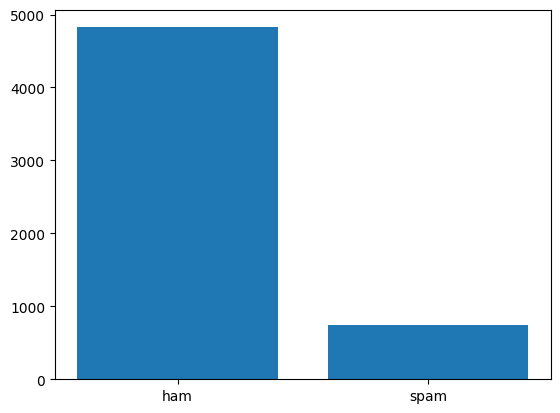

In [ ]:
plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
rus = SMOTE(random_state=0)
X, y = rus.fit_resample(X, y)

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_copy['text'])
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(df_copy['text'])

In [ ]:
pad_sequences?

In [67]:
max_length = 250
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [68]:
l = LabelEncoder()
labels = l.fit_transform(df['label'])

input_length=max_length

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

In [101]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (3900, 250), Test shape: (1672, 250)


In [119]:
import tensorflow as tf
from tensorflow.keras.layers import Lambda

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=250, input_length=250),
    Bidirectional(SimpleRNN(64, activation='relu', return_sequences=True)),
    Bidirectional(SimpleRNN(32, activation='relu')),
    Dense(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ (None, 250, 250)            │       2,183,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_36 (Bidirectional)     │ (None, 250, 128)            │          40,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_37 (Bidirectional)     │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,703,319 (25.57 MB)

 Trainable params: 2,234,439 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,468,880 (17.05 MB)

In [125]:
batch_size = 64
history = model.fit(X_train, y_train, epochs=2, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/2
61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 646ms/step - accuracy: 0.8631 - loss: 0.3537 - val_accuracy: 0.9659 - val_loss: 0.1151
Epoch 2/2
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 705ms/step - accuracy: 0.9872 - loss: 0.0574 - val_accuracy: 0.9821 - val_loss: 0.0599


In [ ]:
X_train.shape

(3900, 250)

In [ ]:
y_train.shape

(3900,)

In [ ]:
X_test.shape

(1672, 250)

In [ ]:
y_test.shape

(1672,)

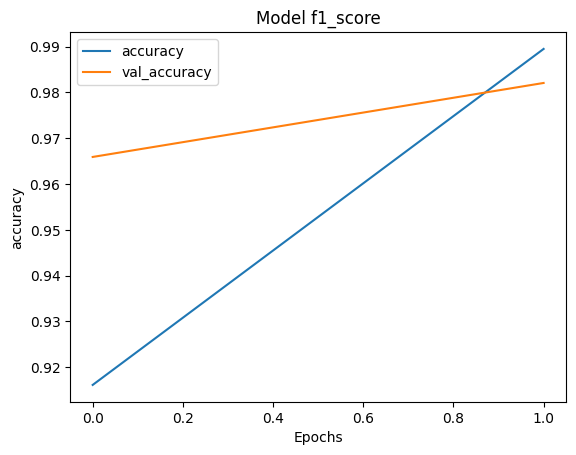

In [126]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Model f1_score')
plt.legend()
plt.show()

In [ ]:
model.fit?

In [ ]:
y.shape

(5572,)

In [ ]:
X.shape

(5572, 5389)

In [ ]:
model.fit?

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [128]:
batch_size = 32
train_d = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_d = train_d.batch(batch_size)
test_d = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_d = test_d.batch(batch_size)

history = model.fit(train_d, epochs=2, validation_data=test_d)

Epoch 1/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 69s 562ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9719 - val_loss: 0.0965
Epoch 2/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 64s 523ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9193 - val_loss: 0.1966


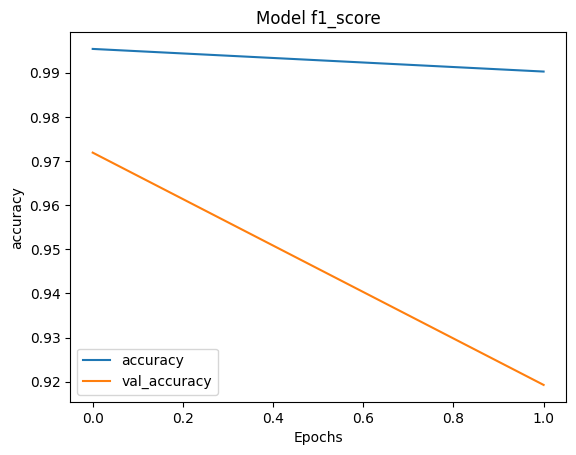

In [129]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Model f1_score')
plt.legend()
plt.show()

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [131]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test Loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9106 - loss: 0.2164
Test Loss: 0.1966, Test accuracy: 0.9193


# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:

- I discovered that the texts contains links, special characters, and so on, so I removed them all and cleaned the dataset
- Because we are implementing in sequential dataset (texts) so we should use sequential models (LSTM, RNN, GRU and so on)
- The layers contains of: Embedding (to represent each value as numerical vector), SimpleRNN(to handle the sequential dataset), and Dense layer as output layer (it set as sigmoid, because we have 2 categories)
- because we are using categorical, so I choose accuracy, F1_score, and those types of evaluation
- the result indicates underfitting because the accuracy is low, and I think it's because the unbalanced dataset we got, so I have to make more layers and make my model more complex